In [145]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [146]:
colors = pd.read_csv('./dataset/colors.csv')
colors.head(5)

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [147]:
inventory_parts = pd.read_csv('./dataset/inventory_parts.csv')
inventory_parts.head(5)

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [148]:
inventory_parts['quantity'].value_counts(ascending=True)

quantity
166         1
260         1
388         1
450         1
810         1
        ...  
6       20144
3       31219
4       62072
2      161796
1      239479
Name: count, Length: 239, dtype: int64

In [149]:
inventory_parts_with_color = inventory_parts.merge(colors, left_on='color_id', right_on='id', how='left')
inventory_parts_with_color.rename(columns={'name': 'color_name'}, inplace=True)
inventory_parts_with_color = inventory_parts_with_color[['inventory_id', 'part_num', 'color_id', 'color_name', 'rgb', 'is_trans', 'quantity', 'is_spare']]
inventory_parts_with_color.head(5)

,inventory_id,part_num,color_id,color_name,rgb,is_trans,quantity,is_spare
0,1,48379c01,72,Dark Bluish Gray,6C6E68,f,1,f
1,1,48395,7,Light Gray,9BA19D,f,1,f
2,1,mcsport6,25,Orange,FE8A18,f,1,f
3,1,paddle,0,Black,05131D,f,1,f
4,3,11816pr0005,78,Light Flesh,F6D7B3,f,1,f


In [150]:
inventories = pd.read_csv('./dataset/inventories.csv')
inventories.head(5)

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [151]:
inventory_sets = pd.read_csv('./dataset/inventory_sets.csv')
inventory_sets.head(5)

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [152]:
sets = pd.read_csv('./dataset/sets.csv')
sets.head(5)

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [153]:
parts = pd.read_csv('./dataset/parts.csv')
parts.head(5)

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [154]:
# parts['name'].value_counts()
parts.shape
# parts['part_cat_id'].isna().value_counts()

(25993, 3)

In [155]:
part_categories = pd.read_csv('./dataset/part_categories.csv')
part_categories.head(5)

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [156]:
parts_with_categories = parts.merge(part_categories, left_on='part_cat_id', right_on='id', how='left')
parts_with_categories.rename(columns={'name_y': 'part_category', 'name_x': 'part_name'}, inplace=True)
parts_with_categories = parts_with_categories[['part_num', 'part_name', 'part_cat_id', 'part_category']]
parts_with_categories.head(5)


,part_num,part_name,part_cat_id,part_category
0,0687b1,Set 0687 Activity Booklet 1,17,Non-LEGO
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1,Baseplates
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1,Baseplates
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1,Baseplates
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1,Baseplates


In [157]:
parts_with_categories_graph = parts_with_categories['part_category'].value_counts()
parts_with_categories_graph.sort_values(ascending=True)

part_category
Tools                                              8
Technic Bushes                                     9
Technic Pins                                      19
Znap                                              22
Technic Beams Special                             22
HO Scale                                          23
Technic Bricks                                    26
Mechanical                                        28
Pneumatics                                        28
Technic Axles                                     28
Tiles                                             30
Technic Beams                                     32
Rock                                              35
Magnets and Holders                               36
Technic Panels                                    56
Plates Angled                                     57
Plates                                            62
Technic Gears                                     68
Technic Steering, Suspension and

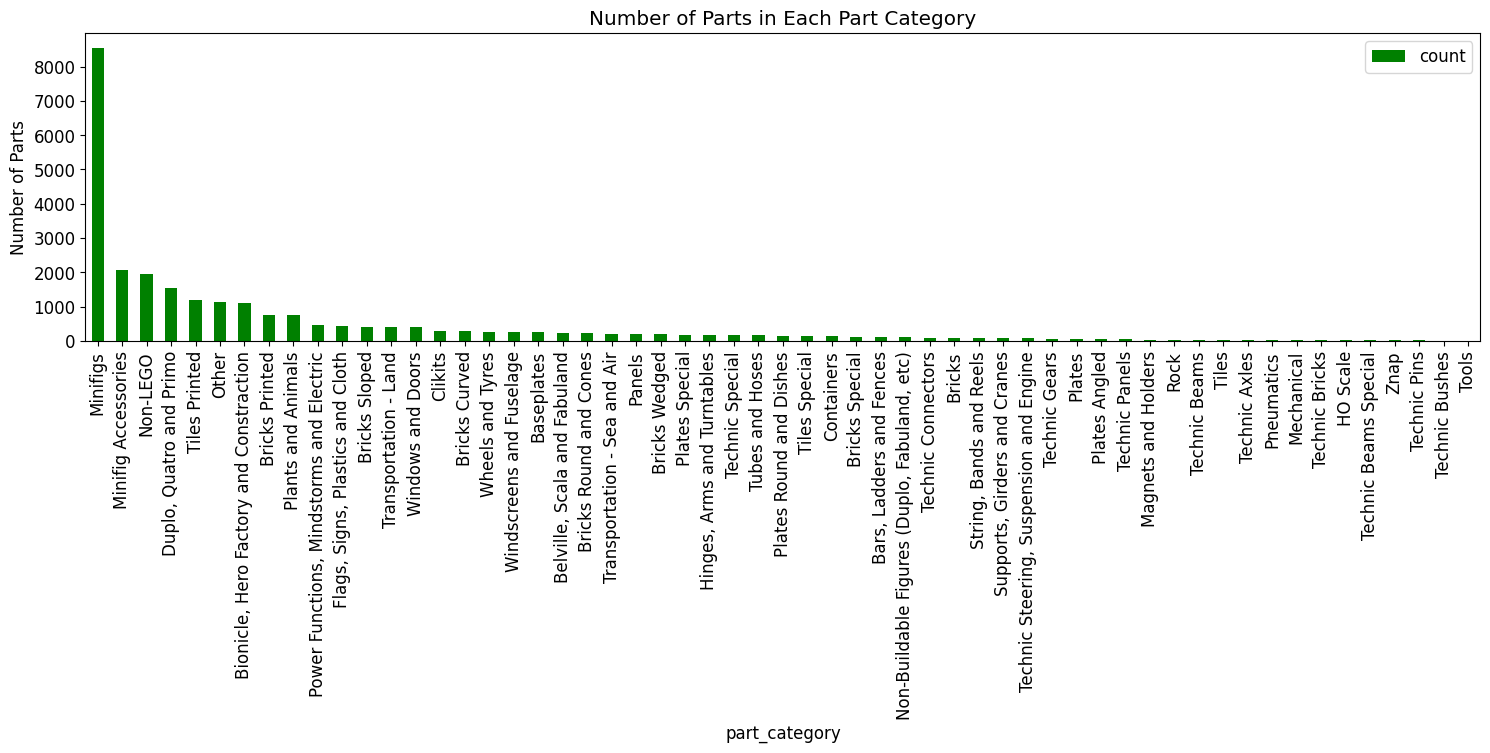

In [158]:
matplotlib.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(figsize=(18,4))
parts_with_categories_graph.plot(kind="bar", color="green", alpha=1)

plt.ylabel('Number of Parts')
plt.title('Number of Parts in Each Part Category')
plt.xticks(rotation=90)
plt.legend()

plt.show()

In [159]:
inventory_with_parts = inventory_parts_with_color.merge(parts_with_categories, on='part_num', how='left')
inventory_with_parts.rename(columns={'name': 'part_name'}, inplace=True)
inventory_with_parts.head(5)

,inventory_id,part_num,color_id,color_name,rgb,is_trans,quantity,is_spare,part_name,part_cat_id,part_category
0,1,48379c01,72,Dark Bluish Gray,6C6E68,f,1,f,Sports Promo Figure Base with Feet,27.0,Minifig Accessories
1,1,48395,7,Light Gray,9BA19D,f,1,f,Sports Promo Snowboard from McDonald's Sports ...,27.0,Minifig Accessories
2,1,mcsport6,25,Orange,FE8A18,f,1,f,Sports Promo Figure Head Torso Assembly McDona...,13.0,Minifigs
3,1,paddle,0,Black,05131D,f,1,f,Sports Promo Paddle from McDonald's Sports Sets,27.0,Minifig Accessories
4,3,11816pr0005,78,Light Flesh,F6D7B3,f,1,f,"Minifig Head Modified - Friends - Green Eyes, ...",13.0,Minifigs


In [160]:
inventory_with_parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580251 entries, 0 to 580250
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   inventory_id   580251 non-null  int64  
 1   part_num       580251 non-null  object 
 2   color_id       580251 non-null  int64  
 3   color_name     580251 non-null  object 
 4   rgb            580251 non-null  object 
 5   is_trans       580251 non-null  object 
 6   quantity       580251 non-null  int64  
 7   is_spare       580251 non-null  object 
 8   part_name      580069 non-null  object 
 9   part_cat_id    580069 non-null  float64
 10  part_category  580069 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 48.7+ MB


In [161]:
inventory_with_parts.shape
# Ultimas 3 columnas (part_name, part_cat_id, category) poseen al menos 182 nulls

(580251, 11)

In [173]:
inventory_with_parts_grouped=inventory_with_parts.groupby('part_num')['quantity'].sum().reset_index().sort_values(by='quantity')
# inventory_with_parts_graph=inventory_with_parts_graph.head(100)
# inventory_with_parts_graph['part_num'].value_counts()
print(inventory_with_parts_grouped)


         part_num  quantity
0          0687b1         1
13180  60119stk01         1
13181       60125         1
13183  60128stk01         1
13184  60129stk01         1
...           ...       ...
4448         3005     46973
4314         3003     48543
13675        6141     53535
4983         3023     58777
4385         3004     69250

[23131 rows x 2 columns]


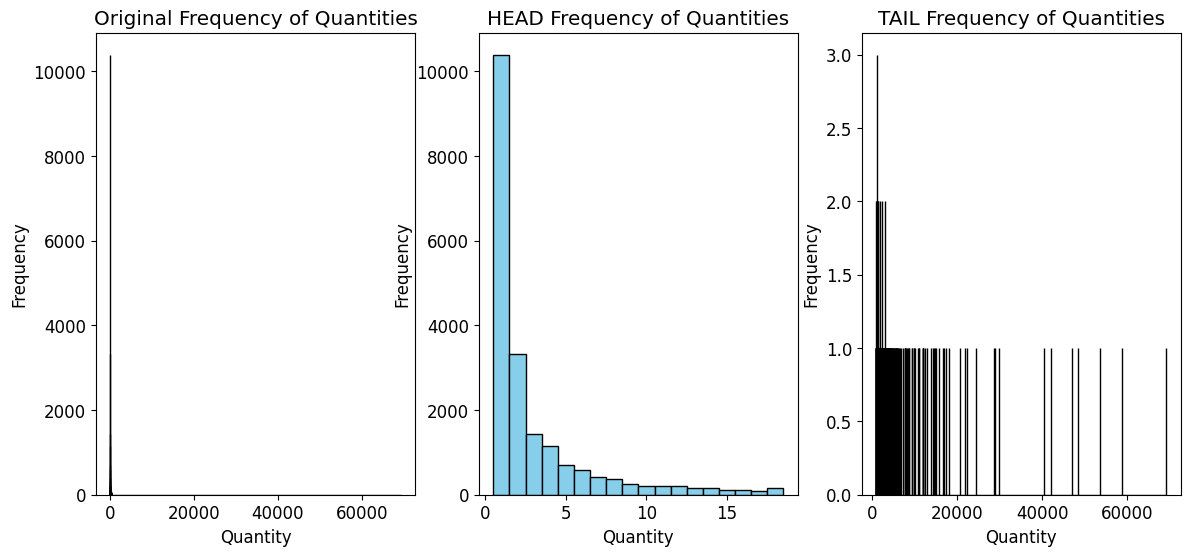

In [163]:

min_range = inventory_with_parts_grouped['quantity'].min()
max_range = inventory_with_parts_grouped['quantity'].max() + 2

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.hist(inventory_with_parts_grouped['quantity'], bins=range(min_range, max_range), color='skyblue', edgecolor='black', align='left')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Original Frequency of Quantities')

min_range = inventory_with_parts_grouped['quantity'].min()
max_range = 20

plt.subplot(1, 3, 2)
plt.hist(inventory_with_parts_grouped['quantity'], bins=range(min_range, max_range), color='skyblue', edgecolor='black', align='left')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('HEAD Frequency of Quantities')

min_range = 1000
max_range = inventory_with_parts_grouped['quantity'].max() + 2

plt.subplot(1, 3, 3)
plt.hist(inventory_with_parts_grouped['quantity'], bins=range(min_range, max_range), color='skyblue', edgecolor='black', align='left')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('TAIL Frequency of Quantities')

plt.show()

In [164]:
result = inventory_with_parts[inventory_with_parts['part_num'] == '3024']
result = result[['inventory_id', 'quantity', 'part_num']]
print(result)
result['quantity'].sum()

        inventory_id  quantity part_num
63                17         6     3024
85                22         1     3024
86                22         2     3024
87                22         4     3024
88                22         1     3024
...              ...       ...      ...
579728         18584         1     3024
579885         18593         2     3024
580193         18708         2     3024
580194         18708         2     3024
580195         18708         2     3024

[6309 rows x 3 columns]


42035

In [165]:
themes = pd.read_csv('./dataset/themes.csv')
themes.head(5)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [166]:
sets_with_themes = sets.merge(themes, left_on='theme_id', right_on='id', how='left')
sets_with_themes.rename(columns={'name_y': 'theme_name', 'name_x': 'name'}, inplace=True)
sets_with_themes = sets_with_themes[['set_num', 'name', 'year', 'theme_id', 'theme_name', 'parent_id', 'num_parts']]
sets_with_themes.head(5)


,set_num,name,year,theme_id,theme_name,parent_id,num_parts
0,00-1,Weetabix Castle,1970,414,Castle,411.0,471
1,0011-2,Town Mini-Figures,1978,84,Supplemental,67.0,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,Lion Knights,186.0,2
3,0012-1,Space Mini-Figures,1979,143,Supplemental,126.0,12
4,0013-1,Space Mini-Figures,1979,143,Supplemental,126.0,12


In [167]:
inventory_sets = pd.read_csv('./dataset/inventory_sets.csv')
inventory_sets.head(5)

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [168]:
inventory_sets_with_sets = inventory_sets.merge(sets_with_themes, on='set_num', how='left')
inventory_sets_with_sets.head(5)

,inventory_id,set_num,quantity,name,year,theme_id,theme_name,parent_id,num_parts
0,35,75911-1,1,McLaren Mercedes Pit Stop,2015,601,Speed Champions,NaN,340
1,35,75912-1,1,Porsche 911 GT Finish Line,2015,601,Speed Champions,NaN,561
2,39,75048-1,1,The Phantom,2014,182,Star Wars Rebels,158.0,233
3,39,75053-1,1,The Ghost,2014,182,Star Wars Rebels,158.0,927
4,50,4515-1,1,Straight Rails,1991,244,9V,241.0,8


In [169]:
inventory_sets_with_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   inventory_id  2846 non-null   int64  
 1   set_num       2846 non-null   object 
 2   quantity      2846 non-null   int64  
 3   name          2846 non-null   object 
 4   year          2846 non-null   int64  
 5   theme_id      2846 non-null   int64  
 6   theme_name    2846 non-null   object 
 7   parent_id     2582 non-null   float64
 8   num_parts     2846 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 200.2+ KB


In [170]:
inventories = pd.read_csv('./dataset/inventories.csv')
inventories.head(5)

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [171]:
inventories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11681 non-null  int64 
 1   version  11681 non-null  int64 
 2   set_num  11681 non-null  object
dtypes: int64(2), object(1)
memory usage: 273.9+ KB
